# Setup

In [1]:
!pip install python-dotenv google-api-python-client

from google.colab import drive
drive.mount('/content/drive')

import os
from dotenv import load_dotenv
load_dotenv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/.envs/.env_github")
github_pat = os.getenv("GITHUB_PAT")
print(f"✅ GITHUB_PAT loaded successfully")
if not github_pat:
    raise ValueError("❌ Error: 'GITHUB_PAT' is missing or invalid in your .env file.")

!git clone https://{github_pat}@github.com/vmagdale2/Fraud-Detection.git

import sys
sys.path.append('/content/Fraud-Detection.git/')
%cd /content/Fraud-Detection/
!pwd
!ls

Mounted at /content/drive
✅ GITHUB_PAT loaded successfully
Cloning into 'Fraud-Detection'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 5 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 16.63 KiB | 16.63 MiB/s, done.
Resolving deltas: 100% (1/1), done.
/content/Fraud-Detection
/content/Fraud-Detection
Data  LICENSE  README.md


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Raw/Base.csv/Base.csv")
y = df['fraud_bool']

In [6]:
gmm_labels = np.load("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Base/gmm_labels_base.npy")
df['gmm_cluster'] = gmm_labels

# Base

## Interpretations

Fraud Rate by GMM Cluster:
 gmm_cluster
0    0.020757
2    0.020119
1    0.009628
Name: fraud_bool, dtype: float64

Total Fraud Cases per Cluster:
 gmm_cluster
0    1137
1    8375
2    1517
Name: fraud_bool, dtype: int64


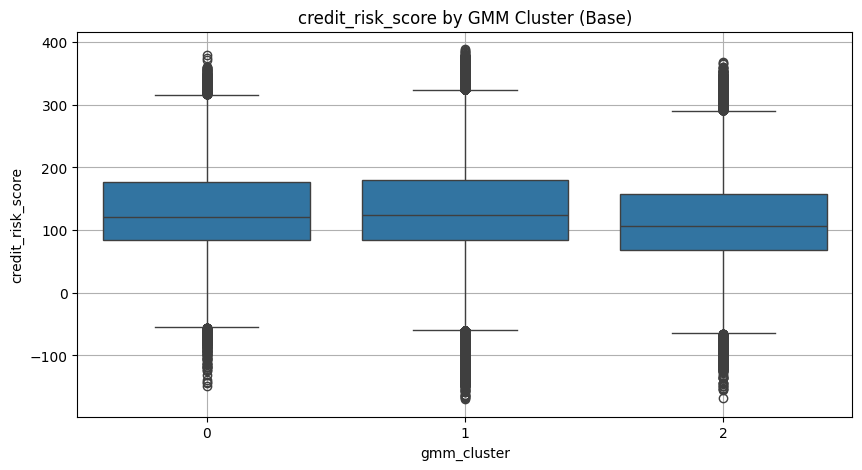

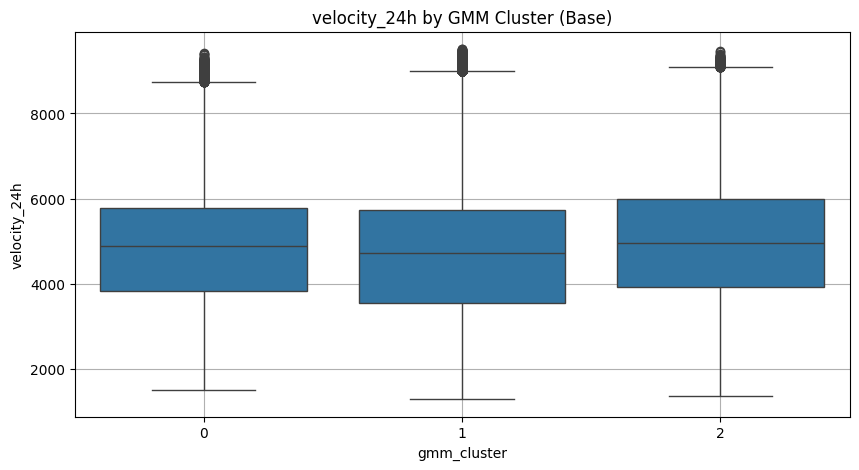

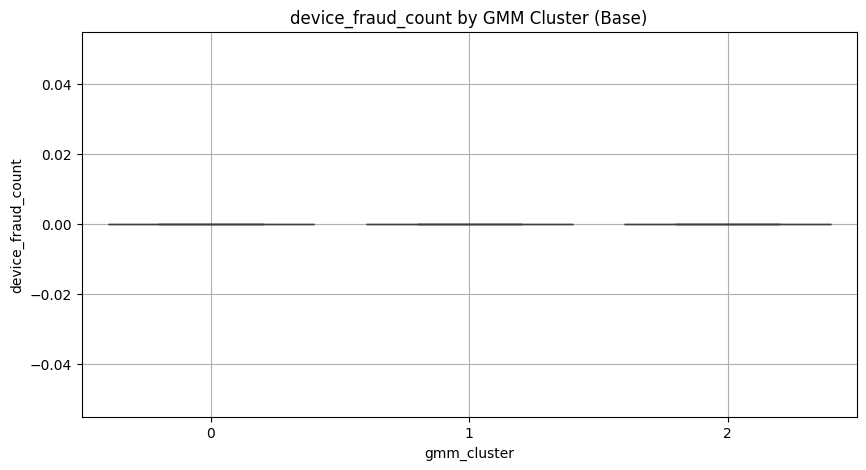


Cluster Profile Summary (Base):



gmm_cluster,0,1,2
fraud_bool,0.02,0.01,0.02
income,0.54,0.57,0.52
name_email_similarity,0.46,0.50,0.47
prev_address_months_count,15.35,16.52,19.98
current_address_months_count,116.32,85.39,78.84
customer_age,46.53,32.86,33.93
days_since_request,1.20,0.72,4.40
intended_balcon_amount,7.18,8.94,6.53
zip_count_4w,1555.89,1565.78,1664.59
velocity_6h,5790.90,5629.87,5982.76


In [7]:
fraud_rate_by_cluster = df.groupby('gmm_cluster')['fraud_bool'].mean().sort_values(ascending=False)
print("Fraud Rate by GMM Cluster:\n", fraud_rate_by_cluster)

total_fraud_per_cluster = df.groupby('gmm_cluster')['fraud_bool'].sum()
print("\nTotal Fraud Cases per Cluster:\n", total_fraud_per_cluster)

features_to_plot = ['credit_risk_score', 'velocity_24h', 'device_fraud_count']

for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='gmm_cluster', y=feature)
    plt.title(f'{feature} by GMM Cluster (Base)')
    plt.grid(True)
    plt.show()

cluster_summary = df.groupby('gmm_cluster').mean(numeric_only=True).T
cluster_summary = cluster_summary.round(2)
print("\nCluster Profile Summary (Base):\n")
display(cluster_summary)

# Variant IV

## Interpretations

In [8]:
df = pd.read_csv("/content/drive/MyDrive/Professional/Portfolio/Fraud Detection/Data/Raw/Variant IV.csv/Variant IV.csv")
y = df['fraud_bool']

In [12]:
gmm_labels = np.load("/content/drive/My Drive/Professional/Portfolio/Fraud Detection/Data/Preprocessed/Base/gmm_labels_variantiv.npy")
df['gmm_cluster'] = gmm_labels

Fraud Rate by GMM Cluster:
 gmm_cluster
0    0.021439
2    0.013002
1    0.010305
Name: fraud_bool, dtype: float64

Total Fraud Cases per Cluster:
 gmm_cluster
0     682
1    8560
2    1788
Name: fraud_bool, dtype: int64


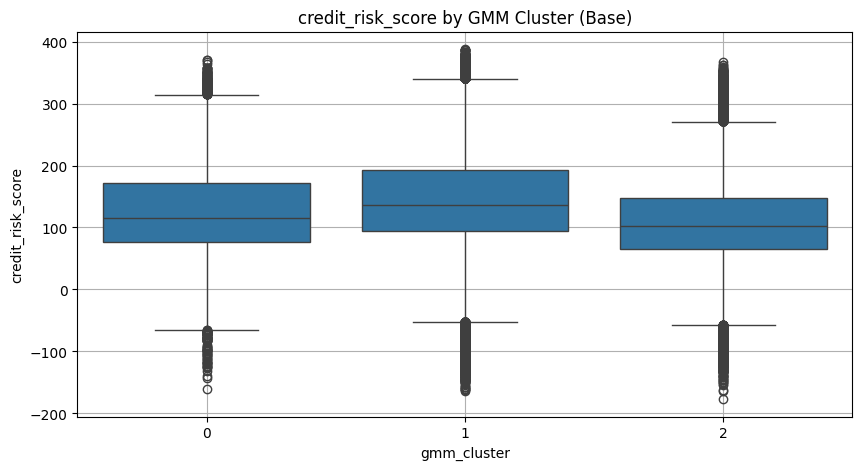

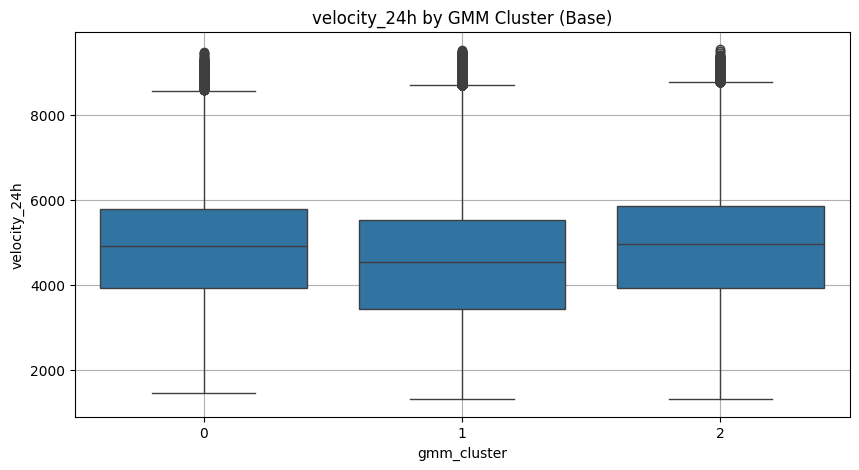

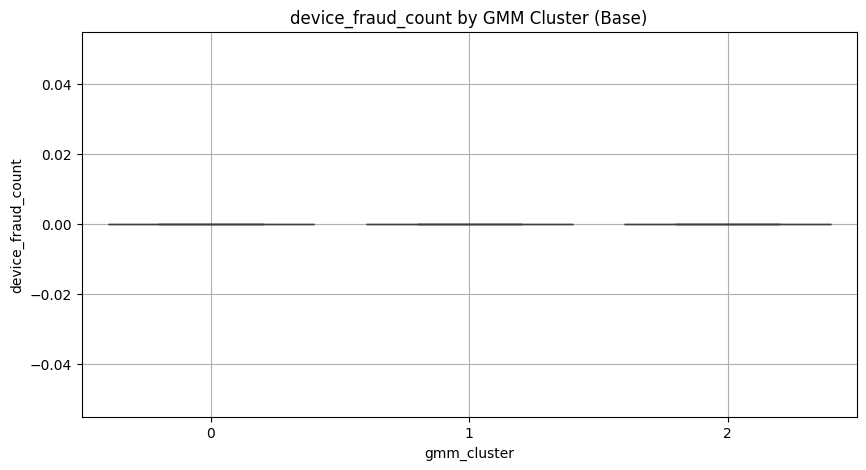


Cluster Profile Summary (Base):



gmm_cluster,0,1,2
fraud_bool,0.02,0.01,0.01
income,0.54,0.59,0.52
name_email_similarity,0.46,0.49,0.48
prev_address_months_count,18.01,13.40,21.61
current_address_months_count,110.91,100.76,87.19
customer_age,48.86,41.36,39.47
days_since_request,2.61,0.02,5.88
intended_balcon_amount,8.23,8.37,9.69
zip_count_4w,1539.14,1504.38,1592.07
velocity_6h,5872.68,5373.02,6105.83


In [13]:
fraud_rate_by_cluster = df.groupby('gmm_cluster')['fraud_bool'].mean().sort_values(ascending=False)
print("Fraud Rate by GMM Cluster:\n", fraud_rate_by_cluster)

total_fraud_per_cluster = df.groupby('gmm_cluster')['fraud_bool'].sum()
print("\nTotal Fraud Cases per Cluster:\n", total_fraud_per_cluster)

features_to_plot = ['credit_risk_score', 'velocity_24h', 'device_fraud_count']

for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='gmm_cluster', y=feature)
    plt.title(f'{feature} by GMM Cluster (Base)')
    plt.grid(True)
    plt.show()

cluster_summary = df.groupby('gmm_cluster').mean(numeric_only=True).T
cluster_summary = cluster_summary.round(2)
print("\nCluster Profile Summary (Base):\n")
display(cluster_summary)